**Step 1:- Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:- Importing the dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chocolate.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


**Step 3:- Data Cleaning**

In [ ]:
# Remove extra spaces (before or after) from all column names
df.columns = [c.strip() for c in df.columns]

In [ ]:
# Convert Amount to numeric (remove $ and commas)
df['Amount'] = df['Amount'].astype(str).str.replace('[$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df.head()  # check the updates

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,NaT,5320,180
1,Van Tuxwell,India,85% Dark Bars,NaT,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,NaT,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,NaT,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,NaT,13685,184


In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df.head()  # check the updates

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,NaT,5320,180
1,Van Tuxwell,India,85% Dark Bars,NaT,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,NaT,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,NaT,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,NaT,13685,184


In [ ]:
# Added required columns
df['Unit Price'] = df['Amount'] / df['Boxes Shipped']
df['YearMonth'] = df['Date'].dt.to_period('M')
df.head() # check the updates

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Unit Price,YearMonth
0,Jehu Rudeforth,UK,Mint Chip Choco,NaT,5320,180,29.555556,NaT
1,Van Tuxwell,India,85% Dark Bars,NaT,7896,94,84.000000,NaT
2,Gigi Bohling,India,Peanut Butter Cubes,NaT,4501,91,49.461538,NaT
3,Jan Morforth,Australia,Peanut Butter Cubes,NaT,12726,342,37.210526,NaT
4,Jehu Rudeforth,UK,Peanut Butter Cubes,NaT,13685,184,74.375000,NaT


**Step 4:- Updated Summary**

In [ ]:
print("Dataset Shape:", df.shape)
print("Total Revenue:", df['Amount'].sum())
print("Total Boxes Shipped:", df['Boxes Shipped'].sum())
print("Unique Products:", df['Product'].nunique())
print("Unique Countries:", df['Country'].nunique())
print("Unique Sales Persons:", df['Sales Person'].nunique())

Dataset Shape: (1094, 8)
Total Revenue: 6183625
Total Boxes Shipped: 177007
Unique Products: 22
Unique Countries: 6
Unique Sales Persons: 25


**Step 5:- Let's extract insights**

**Insight 1:- Revenue by Country**

/tmp/ipython-input-812462330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


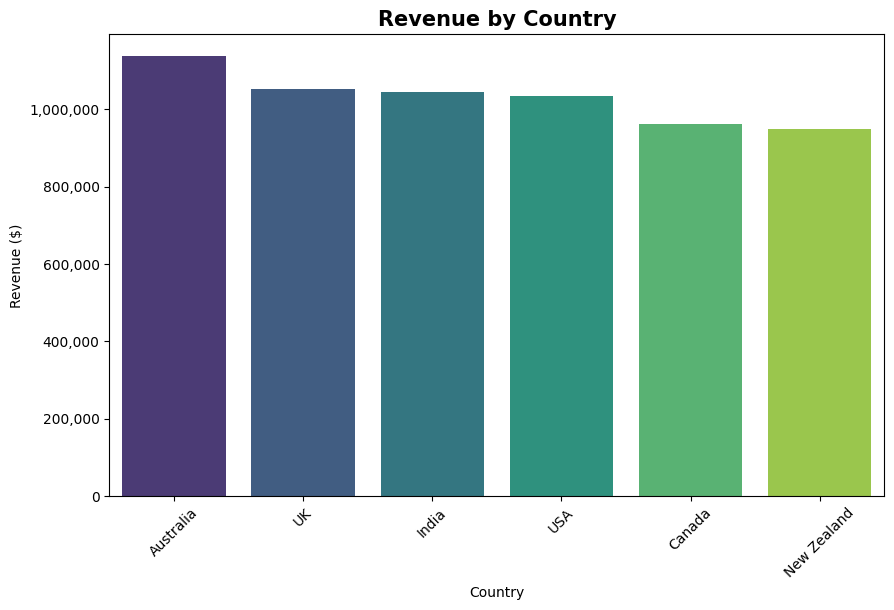

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=df.groupby('Country')['Amount'].sum().sort_values(ascending=False).index,
    y=df.groupby('Country')['Amount'].sum().sort_values(ascending=False).values,
    palette="viridis"
)
plt.title("Revenue by Country", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # Avoid 1e6 number formatting
plt.show()

**Insight 2:- Top Products by Revenue**

/tmp/ipython-input-4193417350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


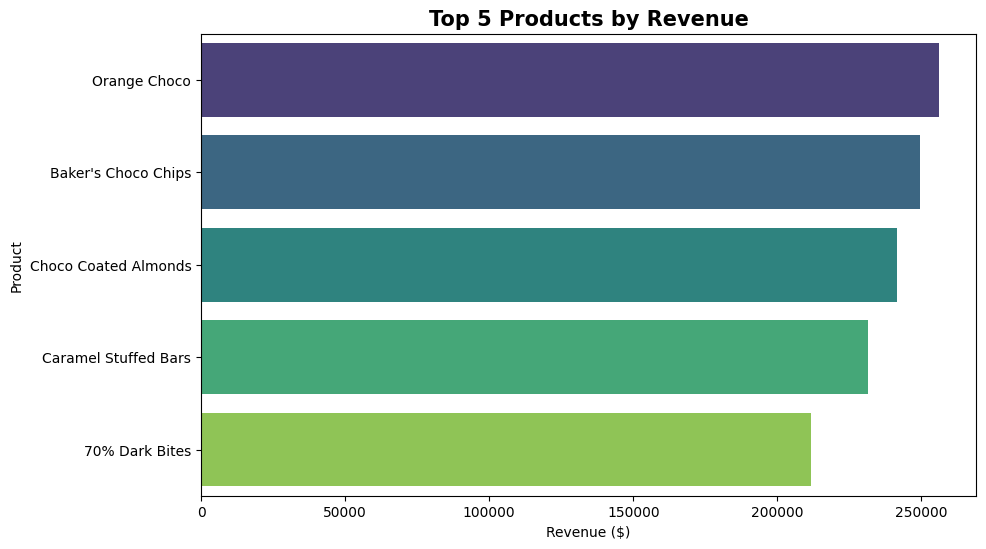

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=df.groupby('Product')['Amount'].sum().sort_values(ascending=False).tail().values,
    y=df.groupby('Product')['Amount'].sum().sort_values(ascending=False).tail().index,
    palette="viridis"
)
plt.title("Top 5 Products by Revenue", fontsize = 15, fontweight = "bold")
plt.xlabel("Revenue ($)")
plt.show()

**Insight 3:- Top Salespersons**

/tmp/ipython-input-2972353232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


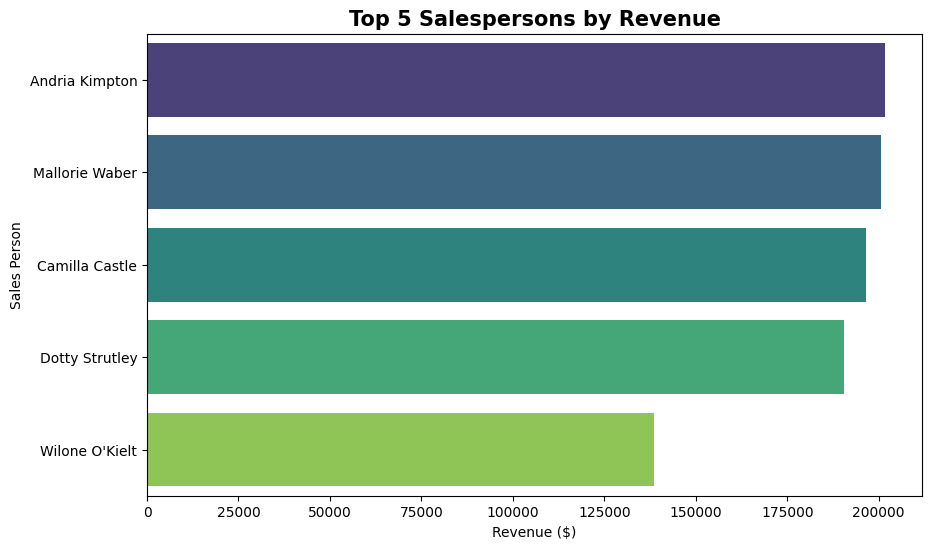

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).tail().values,
    y=df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).tail().index,
    palette="viridis"
)
plt.title("Top 5 Salespersons by Revenue", fontsize = 15, fontweight = "bold")
plt.xlabel("Revenue ($)")
plt.show()

**Insight 4:- Monthly Revenue Trend**

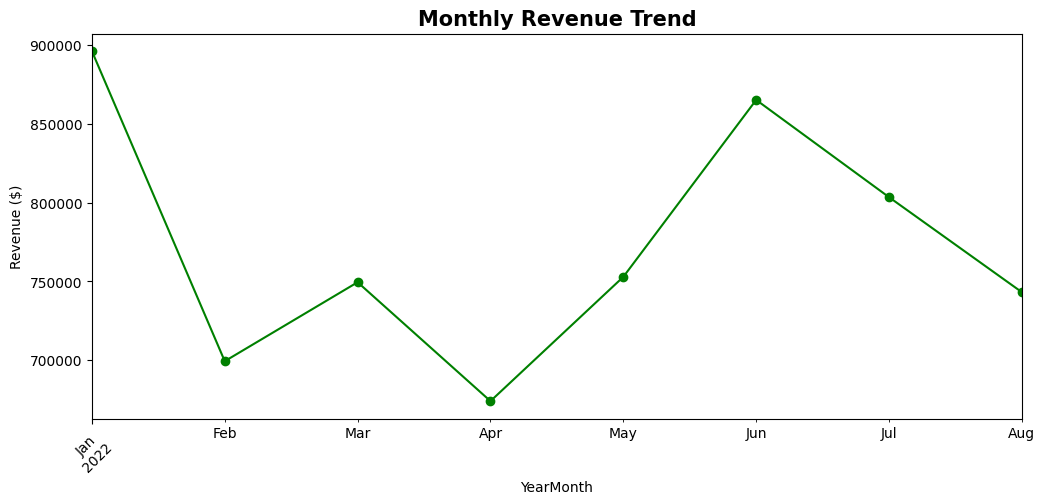

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('YearMonth')['Amount'].sum().plot(marker='o', color="green")
plt.title("Monthly Revenue Trend", fontsize = 15, fontweight = "bold")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

**Insight 5:- Product vs Country**

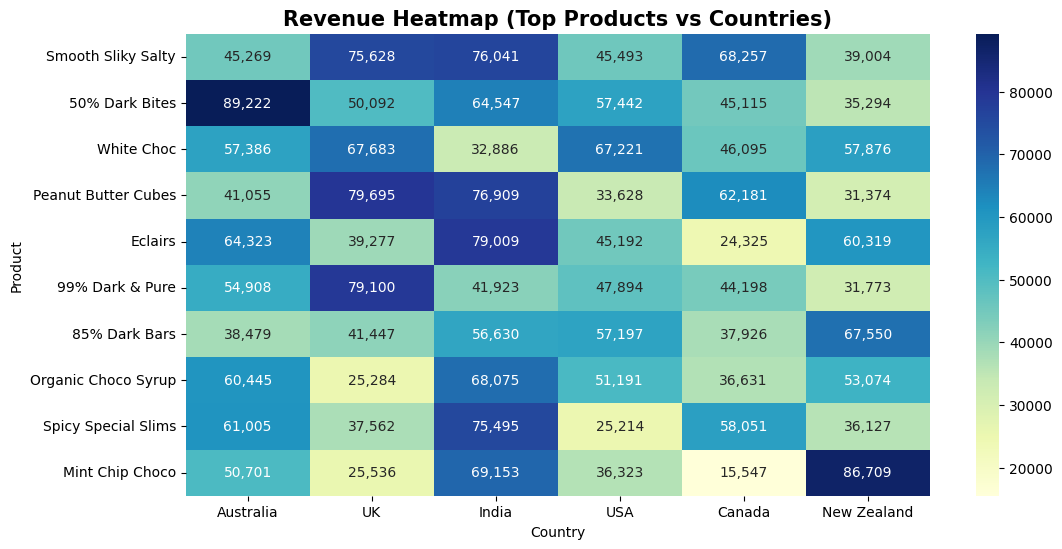

In [ ]:
top_products = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
pivot = df.pivot_table(index='Product', columns='Country', values='Amount', aggfunc='sum', fill_value=0)
top_countries = pivot.sum(axis=0).sort_values(ascending=False).head(6).index
sub_pivot = pivot.loc[top_products, top_countries]

plt.figure(figsize=(12,6))
sns.heatmap(sub_pivot, annot=True, fmt=",", cmap="YlGnBu")
plt.title("Revenue Heatmap (Top Products vs Countries)", fontsize = 15, fontweight = "bold")
plt.show()